*** 
# Dataset #2: Wine Quality Data Set
*** 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import time
from pandas.plotting import scatter_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, train_test_split, validation_curve, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import resample

*** 
## DATA EXPLORATION/DISCOVERY
*** 

In [2]:
# sep=';' since each value is separated using semi-colon instead of comma. 
df = pd.read_csv('../data/winequality-white.csv', sep=';')

In [3]:
# confirm number of rows and columns as indicated by UCI
df.shape

(4898, 12)

In [4]:
# check if any value are null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
# get statistical summary of the dataset per each column
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


Text(0, 0.5, 'Frequency')

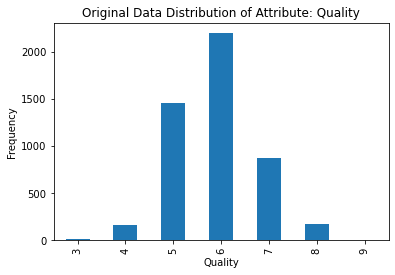

In [6]:
# check original data distribution of source attribute before converting to binary classification
print(df['quality'].value_counts().sort_index())
ax = df['quality'].value_counts().sort_index().plot(title='Original Data Distribution of Attribute: Quality', kind='bar')
ax.set_xlabel('Quality')
ax.set_ylabel('Frequency')

1    3258
0    1640
Name: recommend, dtype: int64


Text(0, 0.5, 'Frequency')

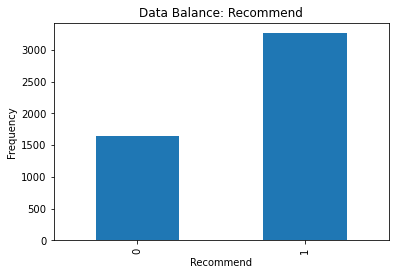

In [7]:
# convert multi-class classification problem into binary by consolidating rows based on existing quality column
# if quality is 6 or above, recommend. otherwise, don't recommend
df['recommend'] = [0 if val<6 else 1 for val in df['quality']]

# check if conversion successful
print(df['recommend'].value_counts())
ax = df['recommend'].value_counts().sort_index().plot(title='Data Balance: Recommend', kind='bar')
ax.set_xlabel('Recommend')
ax.set_ylabel('Frequency')

In [8]:
# drop legacy column
df = df.drop(['quality'], axis=1)
# verify column no longer exists
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  recommend             4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'recommend'}>]], dtype=object)

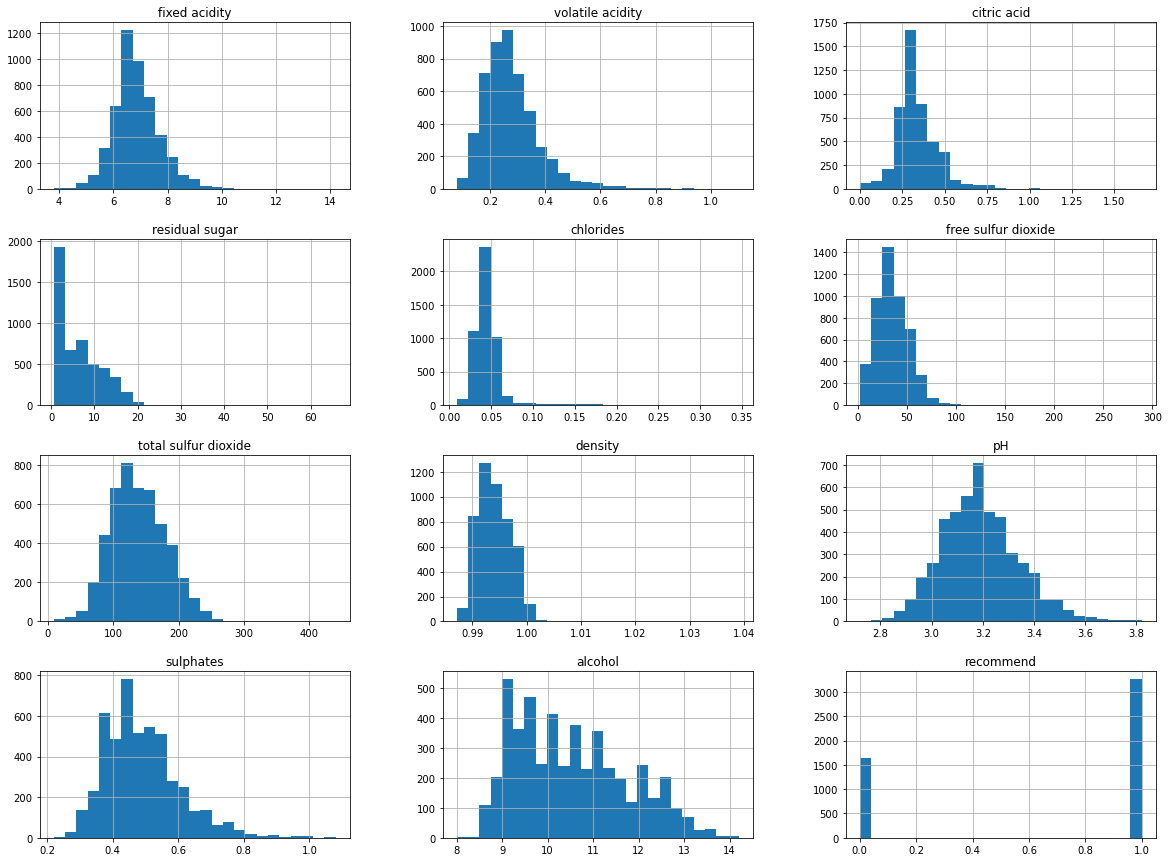

In [9]:
# understand the distribution of rest of data
df.hist(bins=25, figsize=(20,15))

In [10]:
# find basic correlation to establish any obvious relationships
"""
It's interesting to note that even though the feature 'quality' is being used like a qualitative feature,
given the values can easily be converted to integers, we can take advantage of it by using
statistical tools such as correlation to give us an edge. 
"""
corr_matrix = df.corr()
corr_matrix["recommend"].sort_values(ascending=False)

recommend               1.000000
alcohol                 0.383280
pH                      0.083687
sulphates               0.051858
citric acid            -0.000700
free sulfur dioxide    -0.001278
fixed acidity          -0.089749
residual sugar         -0.092756
total sulfur dioxide   -0.170924
chlorides              -0.183939
volatile acidity       -0.225440
density                -0.268696
Name: recommend, dtype: float64

In [11]:
# find number of duplicates
df.duplicated().sum()

937

*** 
## DATA PREPARATION
***

In [12]:
# get statistical summary of the dataset per each column
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,recommend
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [14]:
# X includes input/features
X = np.asarray(df.iloc[:,:-1])
# y includes target class/label
y = np.asarray(df['recommend'])

In [15]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [16]:
# standardize dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [17]:
# confirm data after train test split
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (3918, 11)
X_test: (980, 11)
y_train: (3918,)
y_test: (980,)


*** 
## Custom Functions
***

In [34]:
# plots learning curve showing performance vs. training size
def get_learning_curve_size(clf, clf_name, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=37), scoring="accuracy", train_sizes=np.linspace(start=0.1, stop=1.0, num=5)):
    """
    uses sklearn's learning_curve() to train clf using various sizes of training data
    
    Parameters
    ----------
    train_sizes : array-like of shape (n_ticks,) - see next line
        By default, it's [0.1   0.325 0.55  0.775 1.]
        Think of each float as percentage of total training data.
        So starts at 10%, increases by 22.5% every trial until reaching 100%
    
    cv : int, cross-validation generator/iterable
        - if int, specifies number of folds
    
    """
    sizes, training_scores, valid_scores = learning_curve(clf, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes)

    # average training & validation scores
    avg_training_score = np.mean(training_scores, axis=1)
    avg_valid_scores = np.mean(valid_scores, axis=1)

    # plot and show
    plt.plot(sizes, avg_training_score, color="blue", label="Training Performance")
    plt.plot(sizes, avg_valid_scores, color="red", label="Validation Performance")
    plt.title("Training Size Learning Curve for {}".format(clf_name))
    plt.xlabel("Training Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()
    

# plots loss curve showing loss vs. iteration
def get_loss_curve(clf, clf_name):
    """
    uses MLPClassifier's loss_curve_ attribute to plot accuracy over iterations
    purpose of this function is to plot performance over time and therefore iterations.
   
    """
    # plot and show
    loss_curve = pd.DataFrame(clf.loss_curve_)
    loss_curve = loss_curve.set_axis(['Neural Network Performance'], axis=1, inplace=False)
    loss_curve.plot()
    plt.title("Iterative Loss Curve for {}".format(clf_name))
    plt.xlabel("Iterations"), plt.ylabel("Loss"), plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()    

*** 
## CLASSIFICATION MODELS
***
***
### 2.1 Decision Tree
*** 

Total Training Time: 0.01603s
Total Testing Time: 0.0s
Accuracy using test set: 0.7714285714285715
Accuracy using cross-validation: 0.7935923787288154
[[202 111]
 [113 554]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       313
           1       0.83      0.83      0.83       667

    accuracy                           0.77       980
   macro avg       0.74      0.74      0.74       980
weighted avg       0.77      0.77      0.77       980



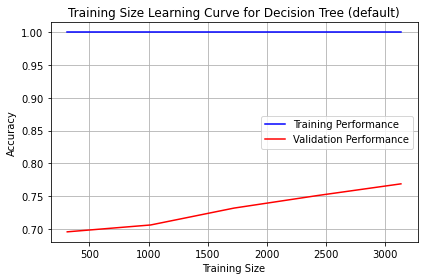

In [43]:
"""
Decision Tree (default)
"""
# initialize
dt_clf = DecisionTreeClassifier(random_state=40)
# start timer for training
start = time.time()
# train classifier
dt_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time: {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = dt_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time: {round(end-start, 5)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(dt_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=dt_clf, clf_name="Decision Tree (default)", scoring="accuracy", X=X_train, y=y_train)

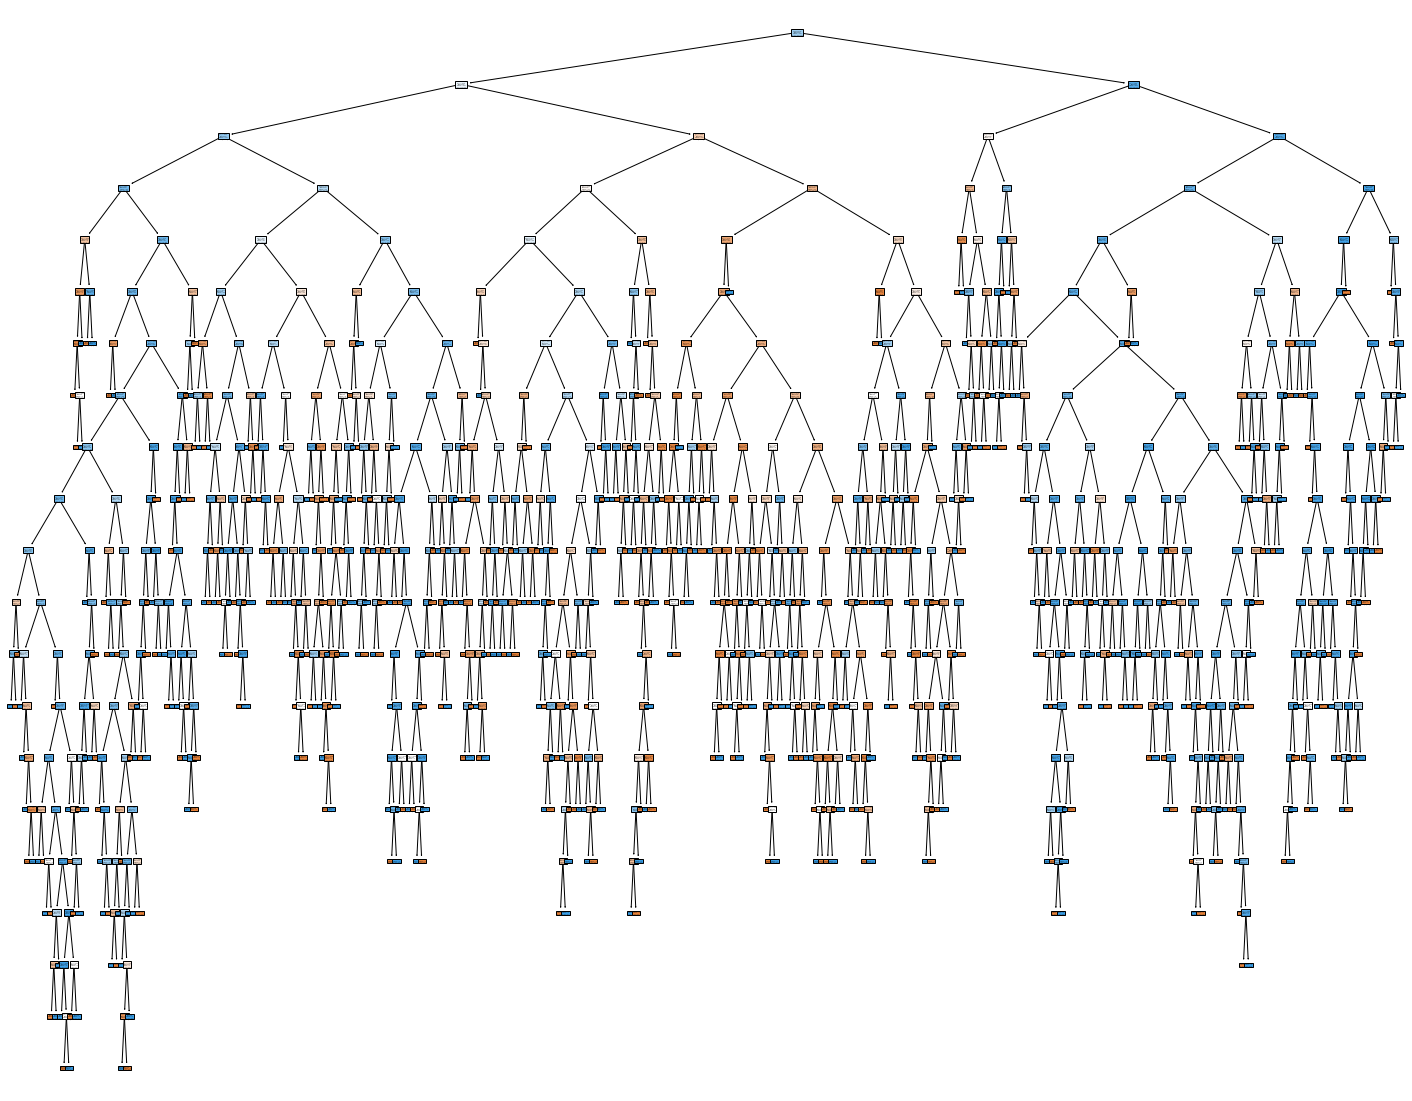

In [44]:
# visualize tree
plt.figure(figsize=(25,20))
_ = plot_tree(dt_clf, filled = True)

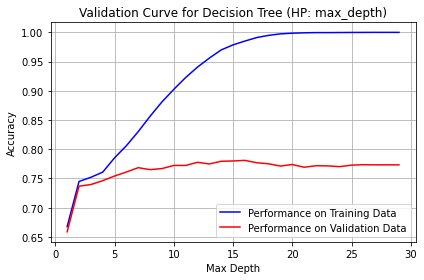

In [45]:
"""
Decision Tree (hyperparameter tuning): max_depth

"""

# initialize
dt_clf = DecisionTreeClassifier(random_state=37)

# plot validation curve using training data
param_range = np.arange(1, 30, 1)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(dt_clf, X=X_train, y=y_train, 
                                             param_name="max_depth", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Decision Tree (HP: max_depth)")
plt.xlabel("Max Depth"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

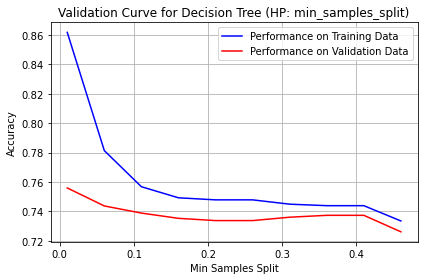

In [46]:
"""
Decision Tree (hyperparameter tuning): minimum samples split
"""

# initialize
dt_clf = DecisionTreeClassifier(random_state=37)

# plot validation curve using training data
param_range = np.arange(0.01, .5, .05)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(dt_clf, X=X_train, y=y_train, 
                                             param_name="min_samples_split", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Decision Tree (HP: min_samples_split)")
plt.xlabel("Min Samples Split"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

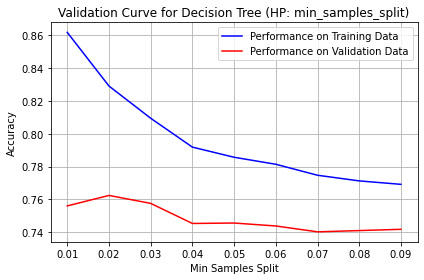

In [47]:
"""
Decision Tree (hyperparameter tuning): minimum samples split
"""

# initialize
dt_clf = DecisionTreeClassifier(random_state=37)

# plot validation curve using training data
param_range = np.arange(0.00, .1, .01)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(dt_clf, X=X_train, y=y_train, 
                                             param_name="min_samples_split", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Decision Tree (HP: min_samples_split)")
plt.xlabel("Min Samples Split"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

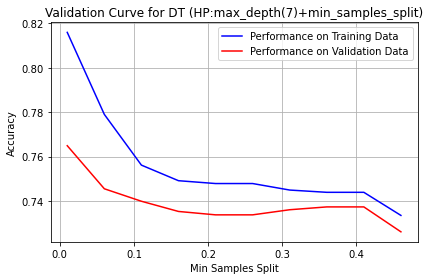

In [48]:
"""
Decision Tree (hyperparameter tuning): max_depth & minimum samples split
"""

# initialize
dt_clf = DecisionTreeClassifier(random_state=37, max_depth=7)

# plot validation curve using training data
param_range = np.arange(0.01, .5, .05)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(dt_clf, X=X_train, y=y_train, 
                                             param_name="min_samples_split", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for DT (HP:max_depth(7)+min_samples_split)")
plt.xlabel("Min Samples Split"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

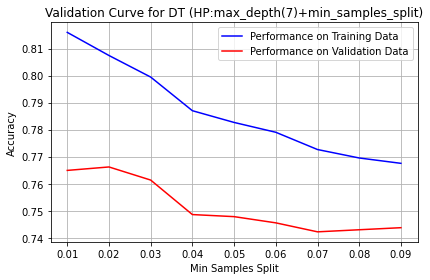

In [49]:
"""
Decision Tree (hyperparameter tuning): max_depth & minimum samples split
"""

# initialize
dt_clf = DecisionTreeClassifier(random_state=37, max_depth=7)

# plot validation curve using training data
param_range = np.arange(0.01, .1, .01)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(dt_clf, X=X_train, y=y_train, 
                                             param_name="min_samples_split", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for DT (HP:max_depth(7)+min_samples_split)")
plt.xlabel("Min Samples Split"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

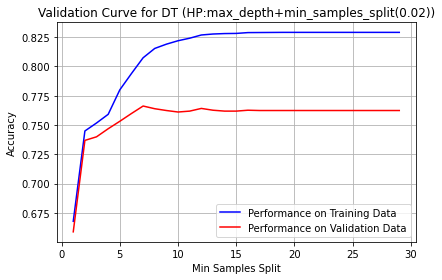

In [50]:
"""
Decision Tree (hyperparameter tuning): max_depth & minimum samples split
"""

# initialize
dt_clf = DecisionTreeClassifier(random_state=37, min_samples_split=.02)

# plot validation curve using training data
param_range = np.arange(0, 30, 1)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(dt_clf, X=X_train, y=y_train, 
                                             param_name="max_depth", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for DT (HP:max_depth+min_samples_split(0.02))")
plt.xlabel("Min Samples Split"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

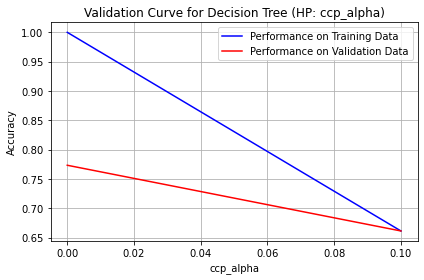

In [51]:
"""
Decision Tree (hyperparameter tuning): ccp_alpha
Observations:
    - Given the model's accuracy on the training set was still very overfit, I looked for
    other hyperparameters which would lower the overfit while keeping the accuracy high. 
    - The accuracy drops continously until levels out at minimum_samples_split = 30
    - Minimum_samples_split should not be considered as a hyperparameter as it only affects the model negatively.
"""

# initialize
dt_clf = DecisionTreeClassifier(random_state=37)

# plot validation curve using training data
param_range = np.arange(0.0, .11, .1)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(dt_clf, X=X_train, y=y_train, 
                                             param_name="ccp_alpha", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Decision Tree (HP: ccp_alpha)")
plt.xlabel("ccp_alpha"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

In [52]:
"""
Decision Tree (hyperparameter optimization and confirmation) using Gridsearch
"""

dt_clf = DecisionTreeClassifier(random_state=37)

# list hyperparameters to compare
h_params = {
    'max_depth': range(1, 15),
    'min_samples_split':np.arange(0.00, 0.1, .01),
    'ccp_alpha': np.arange(0.0, 0.5, .1)
}

# intialize grid search
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
grid_search = GridSearchCV(dt_clf, h_params, cv=skfold, scoring='accuracy')

# fit grid search
grid_search.fit(X_train, y_train)

# return grid search results
print("According to gridsearch")
print("Best parameter values:", grid_search.best_params_)
print("Best classifier:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

According to gridsearch
Best parameter values: {'ccp_alpha': 0.0, 'max_depth': 7, 'min_samples_split': 0.02}
Best classifier: DecisionTreeClassifier(max_depth=7, min_samples_split=0.02, random_state=37)
Best score: 0.7662056585086141


C:\Users\JS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
350 fits failed out of a total of 3500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JS\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\JS\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 259, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0];

Total Training Time: 0.0109918118s
Total Testing Time: 0.0s
Accuracy using test set: 0.7479591836734694
Accuracy using cross-validation: 0.7605184382230931
[[195 118]
 [129 538]]
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       313
           1       0.82      0.81      0.81       667

    accuracy                           0.75       980
   macro avg       0.71      0.71      0.71       980
weighted avg       0.75      0.75      0.75       980



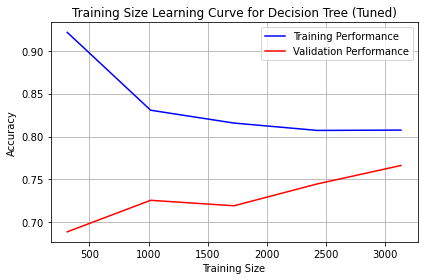

In [54]:
"""
Decision Tree - Final Learning Curve
"""
# initialize
dt_clf = DecisionTreeClassifier(max_depth=7, min_samples_split=0.02, random_state=37, splitter='best')
# start timer for training
start = time.time()
# train classifier
dt_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time: {round(end-start, 10)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = dt_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time: {round(end-start, 10)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(dt_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=dt_clf, clf_name="Decision Tree (Tuned)", scoring='accuracy', X=X_train, y=y_train)

***
### 2.2 Neural Network
*** 

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Total Training Time: 1.86611s
Total Testing Time: 0.001s
Accuracy using test set: 0.8040816326530612
Accuracy using cross-validation: 0.7462248024848346
[[203 110]
 [ 82 585]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       313
           1       0.84      0.88      0.86       667

    accuracy                           0.80       980
   macro avg       0.78      0.76      0.77       980
weighted avg       0.80      0.80      0.80       980



C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

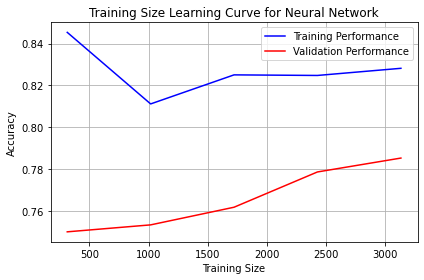

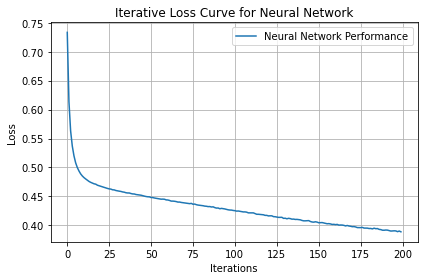

In [26]:
"""
Neural Network (Default)    

"""

# initialize
mlp_clf = MLPClassifier(random_state=37)
# start timer for training
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time: {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = mlp_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time: {round(end-start, 5)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(mlp_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=mlp_clf, clf_name="Neural Network", X=X_train, y=y_train)
# plot loss curve using using training data
get_loss_curve(clf=mlp_clf, clf_name="Neural Network")

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (301) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

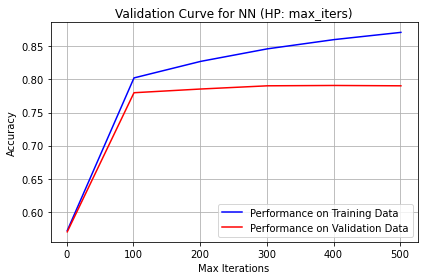

In [27]:
"""
Neural Network (hyperparameter tuning): max_iter

"""

# initialize
mlp_clf = MLPClassifier(random_state=37)

# plot validation curve using training data
param_range = np.arange(1, 601, 100)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(mlp_clf, X=X_train, y=y_train, 
                                             param_name="max_iter", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for NN (HP: max_iters)")
plt.xlabel("Max Iterations"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

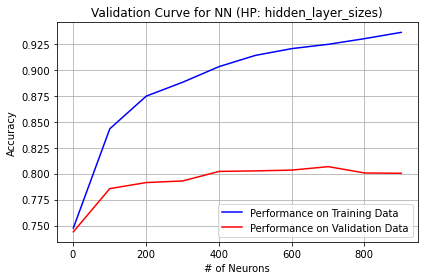

In [56]:
"""
Neural Network (hyperparameter tuning): hidden_layer_sizes (neurons)

"""

# initialize
mlp_clf = MLPClassifier(random_state=37, max_iter=300)

# plot validation curve using training data
param_range = np.arange(1, 1001, 100)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(mlp_clf, X=X_train, y=y_train, 
                                             param_name="hidden_layer_sizes", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for NN (HP: hidden_layer_sizes)")
plt.xlabel("# of Neurons"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

In [57]:
"""
Neural Network (hyperparameter tuning): hidden_layer_sizes (hidden layers)

Observations:
    - This was used to evaluate the effect of implementing multiple hidden layers.
    - Given the param_range is difficult to adjust in validation_curve function, and since
    - no more than 3 layers need to be tested, it's worthwhile to manually run them to
    - evaluate the performance per each additional layer

"""

# hidden_layer_size = 1
mlp_clf = MLPClassifier(hidden_layer_sizes=(700), max_iter=300, random_state=37)
# start timer
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer
end = time.time()
# print total training time
print(f"Total Training Time (HLS=1): {round(end-start, 5)}s")
# make prediction
y_pred = mlp_clf.predict(X_test)
# evaluate model performance
print("Accuracy (HLS=1):", round(accuracy_score(y_test, y_pred),5))

# hidden_layer_size = 2
mlp_clf = MLPClassifier(hidden_layer_sizes=(700, 700), max_iter=300, random_state=37)
# start timer
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer
end = time.time()
# print total training time
print(f"Total Training Time (HLS=2): {round(end-start, 5)}s")
# make prediction
y_pred = mlp_clf.predict(X_test)
# evaluate model performance
print("Accuracy (HLS=2):", round(accuracy_score(y_test, y_pred),5))

# hidden_layer_size = 3
mlp_clf = MLPClassifier(hidden_layer_sizes=(700, 700, 700), max_iter=300, random_state=37)
# start timer
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer
end = time.time()
# print total training time
print(f"Total Training Time (HLS=3): {round(end-start, 5)}s")
# make prediction
y_pred = mlp_clf.predict(X_test)
# evaluate model performance
print("Accuracy (HLS=3):", round(accuracy_score(y_test, y_pred),5))

# hidden_layer_size increasing
mlp_clf = MLPClassifier(hidden_layer_sizes=(350, 700), max_iter=300, random_state=37)
# start timer
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer
end = time.time()
# print total training time
print(f"Total Training Time (HLS increasing): {round(end-start, 5)}s")
# make prediction
y_pred = mlp_clf.predict(X_test)
# evaluate model performance
print("Accuracy (HLS increasing):", round(accuracy_score(y_test, y_pred),5))

# hidden_layer_size decreasing
mlp_clf = MLPClassifier(hidden_layer_sizes=(700, 350), max_iter=300, random_state=37)
# start timer
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer
end = time.time()
# print total training time
print(f"Total Training Time (HLS decreasing): {round(end-start, 5)}s")
# make prediction
y_pred = mlp_clf.predict(X_test)
# evaluate model performance
print("Accuracy (HLS decreasing):", round(accuracy_score(y_test, y_pred),5))

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Total Training Time (HLS=1): 14.44176s
Accuracy (HLS=1): 0.80714
Total Training Time (HLS=2): 52.73473s
Accuracy (HLS=2): 0.80816
Total Training Time (HLS=3): 52.85942s
Accuracy (HLS=3): 0.82347
Total Training Time (HLS increasing): 37.0989s
Accuracy (HLS increasing): 0.81531
Total Training Time (HLS decreasing): 30.40097s
Accuracy (HLS decreasing): 0.82347


In [58]:
"""
Neural Network (hyperparameter tuning): hidden_layer_sizes (hidden layers) #2

Observations:
    - This was used to evaluate the effect of implementing multiple hidden layers.
    - Given the param_range is difficult to adjust in validation_curve function, and since
    - no more than 3 layers need to be tested, it's worthwhile to manually run them to
    - evaluate the performance per each additional layer

"""

# hidden_layer_size = 1
mlp_clf = MLPClassifier(hidden_layer_sizes=(500), max_iter=300, random_state=37)
# start timer
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer
end = time.time()
# print total training time
print(f"Total Training Time (HLS=1): {round(end-start, 5)}s")
# make prediction
y_pred = mlp_clf.predict(X_test)
# evaluate model performance
print("Accuracy (HLS=1):", round(accuracy_score(y_test, y_pred),5))

# hidden_layer_size = 2
mlp_clf = MLPClassifier(hidden_layer_sizes=(500, 500), max_iter=300, random_state=37)
# start timer
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer
end = time.time()
# print total training time
print(f"Total Training Time (HLS=2): {round(end-start, 5)}s")
# make prediction
y_pred = mlp_clf.predict(X_test)
# evaluate model performance
print("Accuracy (HLS=2):", round(accuracy_score(y_test, y_pred),5))

# hidden_layer_size = 3
mlp_clf = MLPClassifier(hidden_layer_sizes=(500, 500, 500), max_iter=300, random_state=37)
# start timer
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer
end = time.time()
# print total training time
print(f"Total Training Time (HLS=3): {round(end-start, 5)}s")
# make prediction
y_pred = mlp_clf.predict(X_test)
# evaluate model performance
print("Accuracy (HLS=3):", round(accuracy_score(y_test, y_pred),5))

# hidden_layer_size increasing
mlp_clf = MLPClassifier(hidden_layer_sizes=(250, 500), max_iter=300, random_state=37)
# start timer
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer
end = time.time()
# print total training time
print(f"Total Training Time (HLS increasing): {round(end-start, 5)}s")
# make prediction
y_pred = mlp_clf.predict(X_test)
# evaluate model performance
print("Accuracy (HLS increasing):", round(accuracy_score(y_test, y_pred),5))

# hidden_layer_size decreasing
mlp_clf = MLPClassifier(hidden_layer_sizes=(500, 250), max_iter=300, random_state=37)
# start timer
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer
end = time.time()
# print total training time
print(f"Total Training Time (HLS decreasing): {round(end-start, 5)}s")
# make prediction
y_pred = mlp_clf.predict(X_test)
# evaluate model performance
print("Accuracy (HLS decreasing):", round(accuracy_score(y_test, y_pred),5))

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Total Training Time (HLS=1): 9.22351s
Accuracy (HLS=1): 0.81327
Total Training Time (HLS=2): 29.48486s
Accuracy (HLS=2): 0.82143
Total Training Time (HLS=3): 31.75668s
Accuracy (HLS=3): 0.82041
Total Training Time (HLS increasing): 18.84607s
Accuracy (HLS increasing): 0.81939
Total Training Time (HLS decreasing): 14.99198s
Accuracy (HLS decreasing): 0.81939


In [31]:
"""
Neural Network (hyperparameter optimization and confirmation) using Gridsearch

"""

mlp_clf = MLPClassifier(random_state=37)

# list hyperparameters to compare
h_params = {
    #'activation': ['tanh', 'relu'],
    'alpha':[0.0001,0.01],
    'hidden_layer_sizes':[
        (500),
        (500, 500),
        (500, 500, 500), 
        (250, 500),
        (500, 250),
        (200),
        (200, 200),
        (200, 200, 200),
        (200, 100),
        (100, 200),
        (100),
        (100, 100),
        (100, 100, 100),
        (100, 50),
        (50, 100)
    ],
    'learning_rate':['constant', 'adaptive'],
    'max_iter': [100, 200, 300]
    #'solver':['sgd','adam'],
}

# intialize grid search
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
grid_search = GridSearchCV(mlp_clf, h_params, cv=skfold, scoring='accuracy')

# fit grid search
grid_search.fit(X_train, y_train)

# return grid search results
print("According to gridsearch")
print("Best parameter values:", grid_search.best_params_)
print("Best classifier:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

According to gridsearch
Best parameter values: {'alpha': 0.0001, 'hidden_layer_sizes': (500, 500), 'learning_rate': 'constant', 'max_iter': 200}
Best classifier: MLPClassifier(hidden_layer_sizes=(500, 500), random_state=37)
Best score: 0.8101086219928584


In [66]:
"""
Neural Network (hyperparameter optimization and confirmation) using Gridsearch

"""

mlp_clf = MLPClassifier(random_state=37)

# list hyperparameters to compare
h_params = {
    #'activation': ['tanh', 'relu'],
    'alpha':[0.0000001, 0.000001, 0.00001, 0.0001, .001, .01],
    'hidden_layer_sizes':[
        (700),
        (700, 700),
        (700, 700, 700),
        (500),
        (500, 500),
        (500, 500, 500)
    ],
    #'learning_rate':['constant', 'adaptive'],
    'max_iter': [100, 200, 300]
    #'solver':['sgd','adam'],
}

# intialize grid search
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
grid_search = GridSearchCV(mlp_clf, h_params, cv=skfold, scoring='accuracy')

# fit grid search
grid_search.fit(X_train, y_train)

# return grid search results
print("According to gridsearch")
print("Best parameter values:", grid_search.best_params_)
print("Best classifier:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

According to gridsearch
Best parameter values: {'alpha': 0.0001, 'hidden_layer_sizes': (500, 500), 'max_iter': 200}
Best classifier: MLPClassifier(hidden_layer_sizes=(500, 500), random_state=37)
Best score: 0.8101086219928584


Total Training Time: 29.22312s
Total Testing Time: 0.008s
Accuracy using test set: 0.8214285714285714
Accuracy using cross-validation: 0.7219317921244086
[[234  79]
 [ 96 571]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       313
           1       0.88      0.86      0.87       667

    accuracy                           0.82       980
   macro avg       0.79      0.80      0.80       980
weighted avg       0.82      0.82      0.82       980



C:\Users\JS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


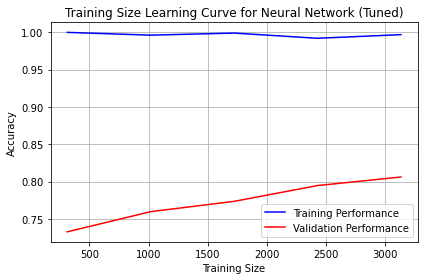

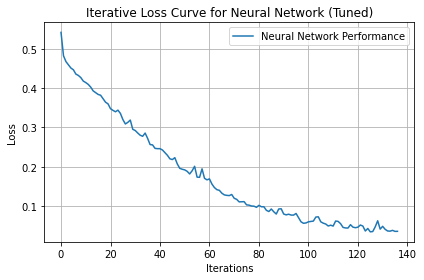

In [60]:
"""
Neural Network - Final Learning Curve

"""
# initialize with a seed
mlp_clf = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(500, 500), 
                        learning_rate='constant', max_iter=200, random_state=37)

# start timer for training
start = time.time()
# train classifier
mlp_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time: {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = mlp_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time: {round(end-start, 5)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(mlp_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=mlp_clf, clf_name="Neural Network (Tuned)", X=X_train, y=y_train)
# plot loss curve using using training data
get_loss_curve(clf=mlp_clf, clf_name="Neural Network (Tuned)")

***
### 2.3 Boosting
*** 

Total Training Time: 0.42191s
Total Testing Time: 0.00597s
Accuracy using test set: 0.7908163265306123
Accuracy using cross-validation: 0.8174738904754957
[[211 102]
 [103 564]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       313
           1       0.85      0.85      0.85       667

    accuracy                           0.79       980
   macro avg       0.76      0.76      0.76       980
weighted avg       0.79      0.79      0.79       980



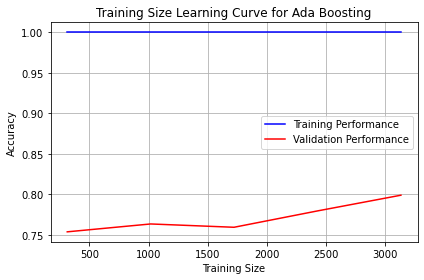

In [73]:
"""
Boosting (Default)

"""

# initialize
dt_clf = DecisionTreeClassifier(max_depth=7, min_samples_split=0.02, random_state=37)

ab_clf = AdaBoostClassifier(dt_clf, random_state=37)

# start timer for training
start = time.time()
# train classifier
ab_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time: {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = ab_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time: {round(end-start, 5)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(ab_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=ab_clf, clf_name="Ada Boosting", X=X_train, y=y_train)

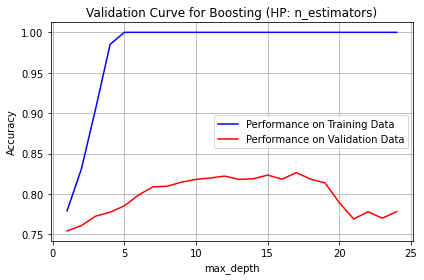

In [78]:
"""
Boosting (hyperparameter tuning): max_depth (base)

"""

# initialize
dt_clf = DecisionTreeClassifier(random_state=37)

ab_clf = AdaBoostClassifier(dt_clf, n_estimators=50, random_state=37)

# plot validation curve using training data
param_range = np.arange(0, 25, 1)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(ab_clf, X=X_train, y=y_train, 
                                             param_name="base_estimator__max_depth", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Boosting (HP: n_estimators)")
plt.xlabel("max_depth"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

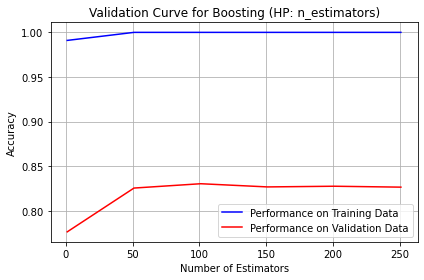

In [79]:
"""
Boosting (hyperparameter tuning): n_estimators

"""

# initialize
dt_clf = DecisionTreeClassifier(max_depth=17, random_state=37)
ab_clf = AdaBoostClassifier(dt_clf, random_state=37)

# plot validation curve using training data
param_range = np.arange(1, 300, 50)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(ab_clf, X=X_train, y=y_train, 
                                             param_name="n_estimators", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Boosting (HP: n_estimators)")
plt.xlabel("Number of Estimators"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

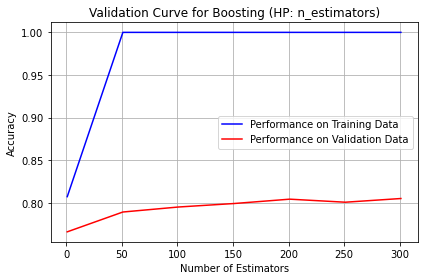

In [81]:
"""
Boosting (hyperparameter tuning): n_estimators (part 2)

"""

# initialize
dt_clf = DecisionTreeClassifier(max_depth=7, min_samples_split=0.02, random_state=37)
ab_clf = AdaBoostClassifier(dt_clf, random_state=37)

# plot validation curve using training data
param_range = np.arange(1, 350, 50)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(ab_clf, X=X_train, y=y_train, 
                                             param_name="n_estimators", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Boosting (HP: n_estimators)")
plt.xlabel("Number of Estimators"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

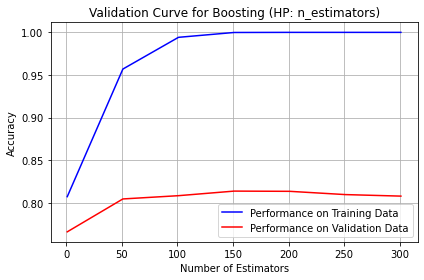

In [91]:
"""
Boosting (hyperparameter tuning): n_estimators (part 3)

"""

# initialize
dt_clf = DecisionTreeClassifier(max_depth=7, min_samples_split=0.02, random_state=37)
ab_clf = AdaBoostClassifier(dt_clf, random_state=37, learning_rate=0.1)

# plot validation curve using training data
param_range = np.arange(1, 350, 50)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(ab_clf, X=X_train, y=y_train, 
                                             param_name="n_estimators", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Boosting (HP: n_estimators)")
plt.xlabel("Number of Estimators"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

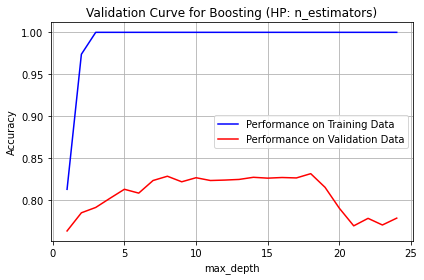

In [82]:
"""
Boosting (hyperparameter tuning): n_estimators (part 4)

"""

# initialize
dt_clf = DecisionTreeClassifier(random_state=37)

ab_clf = AdaBoostClassifier(dt_clf, n_estimators=300, random_state=37)

# plot validation curve using training data
param_range = np.arange(0, 25, 1)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(ab_clf, X=X_train, y=y_train, 
                                             param_name="base_estimator__max_depth", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Boosting (HP: n_estimators)")
plt.xlabel("max_depth"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

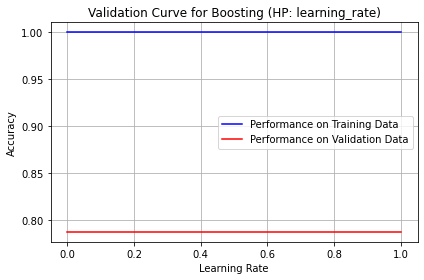

In [83]:
"""
Boosting (hyperparameter tuning): learning_rate
    - Weight applied to each classifier at each boosting iteration.
    - A higher learning rate increases the contribution of each classifier.
    - scikit docs specifically say there's a trade-off between learning_rate and n_estimators
    so next experiment I will plot them together to determine the optimal number for both

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
    
Observations:
    - Per Scikitlearn, "Weight applied to each classifier at each boosting iteration. 
    A higher learning rate increases the contribution of each classifier". Tuning
    the learning_rate would speed up or slow down the "strength" of each weak learner. 
    - Given the model's tendency to underfit with its default values, my intuition was that
    reducing the learning_rate slightly would decrease the bias, leading to a better
    performing model. 
    - After plotting the validation curve, I realized my intuition was wrong. In order to find
    the exact, optimal learning rate, plotted another validation curve with the learning_rate
    set between 0 and 2. 
"""

# initialize
dt_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7, min_samples_split=0.02, 
                                                  random_state=37), random_state=37)

ab_clf = AdaBoostClassifier(dt_clf, random_state=37, n_estimators=300)

# plot validation curve using training data
param_range = [0.0001, 0.001, .01, .1, 1]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(ab_clf, X=X_train, y=y_train, 
                                             param_name="learning_rate", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Boosting (HP: learning_rate)")
plt.xlabel("Learning Rate"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

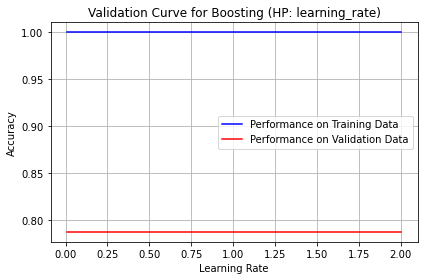

In [84]:
"""
Boosting (hyperparameter tuning): learning_rate (Part 2)
    - Weight applied to each classifier at each boosting iteration.
    - A higher learning rate increases the contribution of each classifier.
    - scikit docs specifically say there's a trade-off between learning_rate and n_estimators
    so next experiment I will plot them together to determine the optimal number for both

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
    
Observations:
    - With the below validation curve, I confirmed learning_rate of 1.5 was most optimal
    
"""

# initialize
dt_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7, min_samples_split=0.02, 
                                                  random_state=37), random_state=37)

ab_clf = AdaBoostClassifier(dt_clf, random_state=37, n_estimators=300)

# plot validation curve using training data
param_range = [.01, .5, 1, 1.5, 2]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(ab_clf, X=X_train, y=y_train, 
                                             param_name="learning_rate", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Boosting (HP: learning_rate)")
plt.xlabel("Learning Rate"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

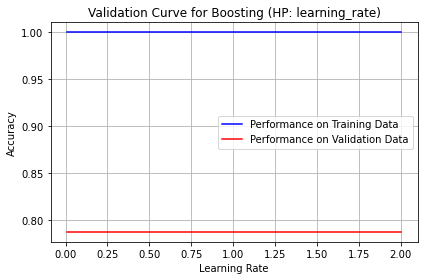

In [85]:
"""
Boosting (hyperparameter tuning): learning_rate (Part 3)
    - Weight applied to each classifier at each boosting iteration.
    - A higher learning rate increases the contribution of each classifier.
    - scikit docs specifically say there's a trade-off between learning_rate and n_estimators
    so next experiment I will plot them together to determine the optimal number for both

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
    
Observations:
    - With the below validation curve, I confirmed learning_rate of 1.5 was most optimal
    
"""

# initialize
# initialize
dt_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7, min_samples_split=0.02, 
                                                  random_state=37), random_state=37)

ab_clf = AdaBoostClassifier(dt_clf, random_state=37, n_estimators=300)

# plot validation curve using training data
param_range = [.01, .1, .5, 1, 1.5, 2]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(ab_clf, X=X_train, y=y_train, 
                                             param_name="learning_rate", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Boosting (HP: learning_rate)")
plt.xlabel("Learning Rate"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

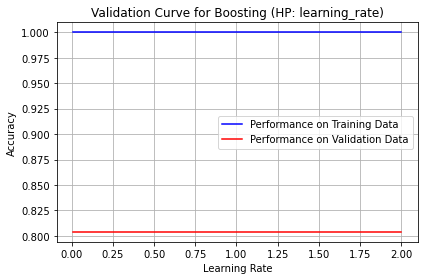

In [86]:
"""
Boosting (hyperparameter tuning): learning_rate (Part 4)
    - Weight applied to each classifier at each boosting iteration.
    - A higher learning rate increases the contribution of each classifier.
    - scikit docs specifically say there's a trade-off between learning_rate and n_estimators
    so next experiment I will plot them together to determine the optimal number for both

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
    
Observations:
    - With the below validation curve, I confirmed learning_rate of 1.5 was most optimal
    
"""

# initialize
dt_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8, min_samples_split=0.05, 
                                                  random_state=37), random_state=37)

ab_clf = AdaBoostClassifier(dt_clf, random_state=37, n_estimators=300)

# plot validation curve using training data
param_range = [.01, .1, .5, 1, 1.5, 2]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(ab_clf, X=X_train, y=y_train, 
                                             param_name="learning_rate", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Boosting (HP: learning_rate)")
plt.xlabel("Learning Rate"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

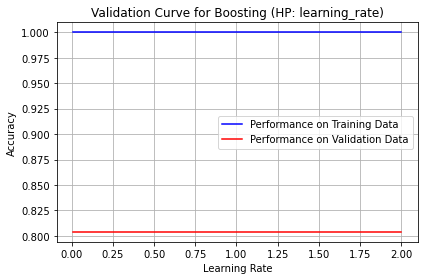

In [90]:
"""
Boosting (hyperparameter tuning): learning_rate (Part 5)
    - Weight applied to each classifier at each boosting iteration.
    - A higher learning rate increases the contribution of each classifier.
    - scikit docs specifically say there's a trade-off between learning_rate and n_estimators
    so next experiment I will plot them together to determine the optimal number for both

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
    
Observations:
    - With the below validation curve, I confirmed learning_rate of 1.5 was most optimal
    
"""

# initialize
# initialize
dt_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8, min_samples_split=0.05, 
                                                  random_state=37), random_state=37)

ab_clf = AdaBoostClassifier(dt_clf, random_state=37, n_estimators=50)

# plot validation curve using training data
param_range = [.01, .1, .5, 1, 1.5, 2]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(ab_clf, X=X_train, y=y_train, 
                                             param_name="learning_rate", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for Boosting (HP: learning_rate)")
plt.xlabel("Learning Rate"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

In [92]:
"""
Boosting (hyperparameter optimization and confirmation) using Gridsearch

"""

# initialize
dt_clf = DecisionTreeClassifier(random_state=37)
ab_clf = AdaBoostClassifier(dt_clf, random_state=37)

# list hyperparameters to compare
h_params = {
    'base_estimator__max_depth': range(1, 10),
    'base_estimator__min_samples_split': np.arange(0.00, .2, .05),
    'n_estimators': [25, 50, 100, 200, 300, 400, 500, 600, 700],
    'learning_rate': np.arange(0, 0.2, 0.05),
    'algorithm':['SAMME', 'SAMME.R']
}

# intialize grid search
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
grid_search = GridSearchCV(ab_clf, h_params, cv=skfold, scoring='accuracy')

# fit grid search
grid_search.fit(X_train, y_train)

# return grid search results
print("According to gridsearch")
print("Best parameter values:", grid_search.best_params_)
print("Best classifier:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

C:\Users\JS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5670 fits failed out of a total of 12960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JS\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\JS\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 114, in fit
    raise ValueError("learning_rate must be greater than 

According to gridsearch
Best parameter values: {'algorithm': 'SAMME.R', 'base_estimator__max_depth': 8, 'base_estimator__min_samples_split': 0.05, 'learning_rate': 0.1, 'n_estimators': 700}
Best classifier: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                         min_samples_split=0.05,
                                                         random_state=37),
                   learning_rate=0.1, n_estimators=700, random_state=37)
Best score: 0.8182748195063466


Total Training Time: 9.52511s
Total Testing Time: 0.15597s
Accuracy using holdout set: 0.79796
Accuracy using cross-validation: 0.7319417981697275


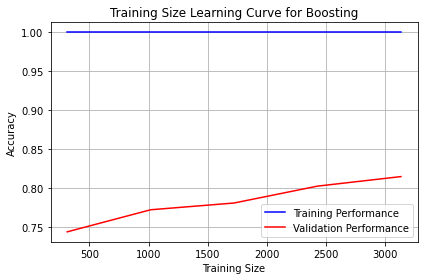

In [93]:
"""
Boosting - Final Learning Curve

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    
"""

# initialize
dt_clf = DecisionTreeClassifier(max_depth=8, min_samples_split=0.05, random_state=37)
ab_clf = AdaBoostClassifier(dt_clf, random_state=37, learning_rate=0.1, n_estimators=700)

# start timer for training
start = time.time()
# train classifier
ab_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time: {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = ab_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time: {round(end-start, 5)}s")

# evaluate model performance on test data (holdout)
print("Accuracy using holdout set:", round(accuracy_score(y_test, y_pred),5))
# evaluate model performance using cross-validation method
cv_scores = cross_val_score(ab_clf, X, y, cv=5)
print("Accuracy using cross-validation:", cv_scores.mean())

# plot learning curve using training and validation data
get_learning_curve_size(clf=ab_clf, clf_name="Boosting", X=X_train, y=y_train)

***
### 2.4 Support Vector Machines
*** 

Total Training Time: 0.21803s
Total Testing Time: 0.09203s
Accuracy using test set: 0.8
Accuracy using cross-validation: 0.6661904067040504
[[202 111]
 [ 85 582]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       313
           1       0.84      0.87      0.86       667

    accuracy                           0.80       980
   macro avg       0.77      0.76      0.76       980
weighted avg       0.80      0.80      0.80       980



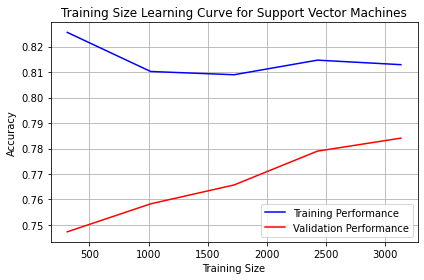

In [32]:
"""
Support Vector Machines (SVM) (Default)


"""

# initialize
svm_clf = SVC(random_state=37)
# start timer for training
start = time.time()
# train classifier
svm_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time: {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = svm_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time: {round(end-start, 5)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(svm_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=svm_clf, clf_name="Support Vector Machines", X=X_train, y=y_train)

Linear: 0.762
Polynomial: 0.768
Radial Basis: 0.8
Sigmoid: 0.667


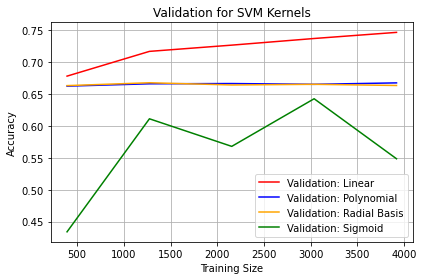

In [37]:
"""
Support Vector Machines (SVM) (hyperparameter tuning): kernel

"""

# initialize
svm_clf = SVC(random_state=37)

# plot effect of kernel choice on cross-validation performance
lin_score = 0
pol_score = 0
rbf_score = 0
sig_score = 0
pre_score = 0

lin_svm_clf = SVC(random_state=37, kernel='linear')
lin_svm_clf.fit(X_train, y_train)
y_pred = lin_svm_clf.predict(X_test)
lin_score = accuracy_score(y_test,y_pred)
print("Linear:", round(lin_score, 3))

pol_svm_clf = SVC(random_state=37, kernel='poly')
pol_svm_clf.fit(X_train, y_train)
y_pred = pol_svm_clf.predict(X_test)
pol_score = accuracy_score(y_test,y_pred)
print("Polynomial:", round(pol_score, 3))

rbf_svm_clf = SVC(random_state=37, kernel='rbf')
rbf_svm_clf.fit(X_train, y_train)
y_pred = rbf_svm_clf.predict(X_test)
rbf_score = accuracy_score(y_test,y_pred)
print("Radial Basis:", round(rbf_score, 3))

sig_svm_clf = SVC(random_state=37, kernel='sigmoid')
sig_svm_clf.fit(X_train, y_train)
y_pred = sig_svm_clf.predict(X_test)
sig_score = accuracy_score(y_test,y_pred)
print("Sigmoid:", round(sig_score, 3))

counter=0
for clf in [lin_svm_clf, pol_svm_clf, rbf_svm_clf, sig_svm_clf]:
    sizes, training_scores, valid_scores = learning_curve(clf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(start=0.1, stop=1.0, num=5))

    # average training & validation scores
    avg_training_score = np.mean(training_scores, axis=1)
    avg_valid_scores = np.mean(valid_scores, axis=1)
    
    if counter==0:
        plt.plot(sizes, avg_valid_scores, color="red", label="Validation: Linear")
    elif counter==1:
        plt.plot(sizes, avg_valid_scores, color="blue", label="Validation: Polynomial")
    elif counter==2:
        plt.plot(sizes, avg_valid_scores, color="orange", label="Validation: Radial Basis")
    elif counter==3:
        plt.plot(sizes, avg_valid_scores, color="green", label="Validation: Sigmoid")
    counter+=1
        
# plot and show
plt.title("Validation for SVM Kernels")
plt.xlabel("Training Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

Linear: 0.762
Polynomial: 0.762
Radial Basis: 0.796
Sigmoid: 0.654


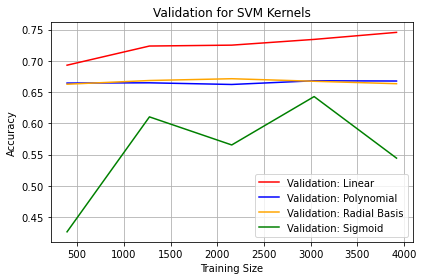

In [36]:
"""
Support Vector Machines (SVM) (hyperparameter tuning): kernel

"""

# initialize
svm_clf = SVC(random_state=37)

# plot effect of kernel choice on cross-validation performance
lin_score = 0
pol_score = 0
rbf_score = 0
sig_score = 0
pre_score = 0

lin_svm_clf = SVC(random_state=37, kernel='linear', C=10)
lin_svm_clf.fit(X_train, y_train)
y_pred = lin_svm_clf.predict(X_test)
lin_score = accuracy_score(y_test,y_pred)
print("Linear:", round(lin_score, 3))

pol_svm_clf = SVC(random_state=37, kernel='poly', C=10)
pol_svm_clf.fit(X_train, y_train)
y_pred = pol_svm_clf.predict(X_test)
pol_score = accuracy_score(y_test,y_pred)
print("Polynomial:", round(pol_score, 3))

rbf_svm_clf = SVC(random_state=37, kernel='rbf', C=10)
rbf_svm_clf.fit(X_train, y_train)
y_pred = rbf_svm_clf.predict(X_test)
rbf_score = accuracy_score(y_test,y_pred)
print("Radial Basis:", round(rbf_score, 3))

sig_svm_clf = SVC(random_state=37, kernel='sigmoid', C=10)
sig_svm_clf.fit(X_train, y_train)
y_pred = sig_svm_clf.predict(X_test)
sig_score = accuracy_score(y_test,y_pred)
print("Sigmoid:", round(sig_score, 3))

counter=0
for clf in [lin_svm_clf, pol_svm_clf, rbf_svm_clf, sig_svm_clf]:
    sizes, training_scores, valid_scores = learning_curve(clf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(start=0.1, stop=1.0, num=5))

    # average training & validation scores
    avg_training_score = np.mean(training_scores, axis=1)
    avg_valid_scores = np.mean(valid_scores, axis=1)
    
    if counter==0:
        plt.plot(sizes, avg_valid_scores, color="red", label="Validation: Linear")
    elif counter==1:
        plt.plot(sizes, avg_valid_scores, color="blue", label="Validation: Polynomial")
    elif counter==2:
        plt.plot(sizes, avg_valid_scores, color="orange", label="Validation: Radial Basis")
    elif counter==3:
        plt.plot(sizes, avg_valid_scores, color="green", label="Validation: Sigmoid")
    counter+=1
        
# plot and show
plt.title("Validation for SVM Kernels")
plt.xlabel("Training Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

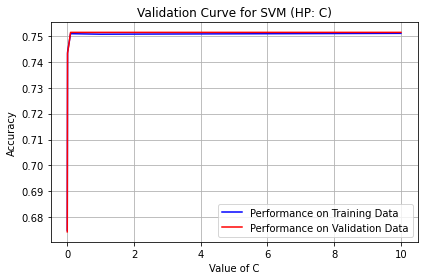

In [34]:
"""
Support Vector Machines (SVM) (hyperparameter tuning): C (linear)
   
"""

# initialize
svm_clf = SVC(random_state=37, kernel='linear')

# plot validation curve using training data
param_range = [0.001, 0.01, 0.1, 1, 10]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(svm_clf, X=X_train, y=y_train, 
                                             param_name="C", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for SVM (HP: C)")
plt.xlabel("Value of C"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

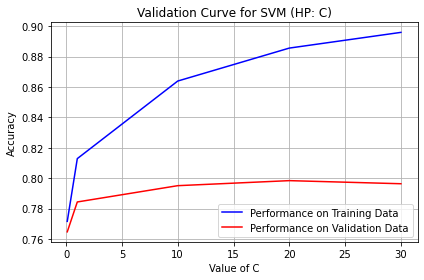

In [35]:
"""
Support Vector Machines (SVM) (hyperparameter tuning): C (rbf)
  
"""

# initialize
svm_clf = SVC(random_state=37)

# plot validation curve using training data
param_range = [0.1, 1, 10, 20, 30]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(svm_clf, X=X_train, y=y_train, 
                                             param_name="C", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for SVM (HP: C)")
plt.xlabel("Value of C"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

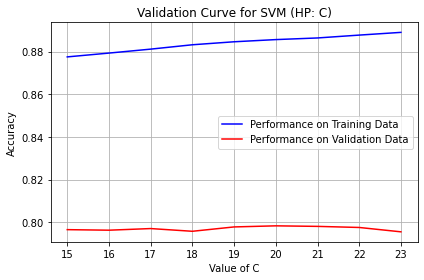

In [38]:
"""
Support Vector Machines (SVM) (hyperparameter tuning): C
   
"""

# initialize
svm_clf = SVC(random_state=37)

# plot validation curve using training data
param_range = [15, 16, 17, 18, 19, 20, 21, 22, 23]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(svm_clf, X=X_train, y=y_train, 
                                             param_name="C", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for SVM (HP: C)")
plt.xlabel("Value of C"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

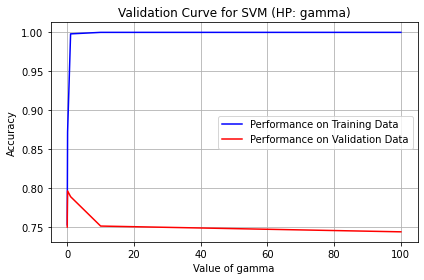

In [39]:
"""
Support Vector Machines (SVM) (hyperparameter tuning): gamma
   
"""

# initialize
svm_clf = SVC(random_state=37, kernel='rbf', C=10)

# plot validation curve using training data
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(svm_clf, X=X_train, y=y_train, 
                                             param_name="gamma", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for SVM (HP: gamma)")
plt.xlabel("Value of gamma"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

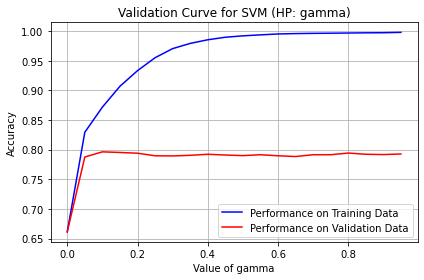

In [40]:
"""
Support Vector Machines (SVM) (hyperparameter tuning): gamma (part 2)
    
"""

# initialize
svm_clf = SVC(random_state=37, kernel='rbf', C=10)

# plot validation curve using training data
param_range = np.arange(0, 1, 0.05)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
train_score, valid_scores = validation_curve(svm_clf, X=X_train, y=y_train, 
                                             param_name="gamma", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for SVM (HP: gamma)")
plt.xlabel("Value of gamma"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

In [41]:
"""
Support Vector Machines (SVM) (hyperparameter optimization and confirmation) using Gridsearch
    - Execute gridsearch to confirm optimal hyperparameters
Observations:
    - sigmoid SVM was eliminated due to its poor performance on the initial cross-validation 
"""

# initialize with set number of neighbors (no need for seed for this algo)
svm_clf = SVC(random_state=37, kernel='rbf')

# list hyperparameters to compare
h_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 'scale'],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# intialize grid search
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
grid_search = GridSearchCV(svm_clf, h_params, cv=skfold, scoring='accuracy')

# fit grid search
grid_search.fit(X_train, y_train)

# return grid search results
print("According to gridsearch")
print("Best parameter values:", grid_search.best_params_)
print("Best classifier:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

C:\Users\JS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JS\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\JS\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 58, i

According to gridsearch
Best parameter values: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best classifier: SVC(C=10, gamma=0.1, random_state=37)
Best score: 0.796319753955222


Total Training Time: 0.27797s
Total Testing Time: 0.08631s
Accuracy using test set: 0.7948979591836735
Accuracy using cross-validation: 0.7664318025473724
[[207 106]
 [ 95 572]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       313
           1       0.84      0.86      0.85       667

    accuracy                           0.79       980
   macro avg       0.76      0.76      0.76       980
weighted avg       0.79      0.79      0.79       980



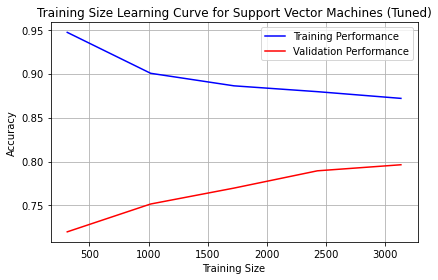

In [42]:
"""
Support Vector Machines (SVM) - Final Learning Curve
- Generate final learning curve

"""
# initialize
svm_clf = SVC(random_state=37, C=10, gamma=0.1, kernel='rbf')

# start timer for training
start = time.time()
# train classifier
svm_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time: {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = svm_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time: {round(end-start, 5)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(svm_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=svm_clf, clf_name="Support Vector Machines (Tuned)", X=X_train, y=y_train)

***
### 2.5 K-Nearest Neighbors
*** 

Total Training Time: 0.00796s
Total Testing Time: 0.03417s
Accuracy using test set: 0.7724489795918368
Accuracy using cross-validation: 0.705186466823706
[[201 112]
 [111 556]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       313
           1       0.83      0.83      0.83       667

    accuracy                           0.77       980
   macro avg       0.74      0.74      0.74       980
weighted avg       0.77      0.77      0.77       980



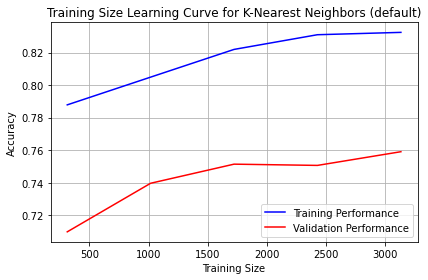

In [24]:
"""
K-Nearest Neighbors (default)

"""

# initialize
knn_clf = KNeighborsClassifier()
# start timer for training
start = time.time()
# train classifier
knn_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time: {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = knn_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time: {round(end-start, 5)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(knn_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=knn_clf, clf_name="K-Nearest Neighbors (default)", cv=skfold, scoring="accuracy", X=X_train, y=y_train)

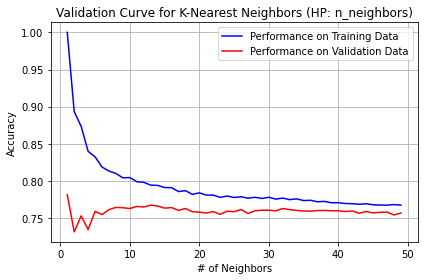

In [25]:
"""
K-Nearest Neighbors (hyperparameter tuning): n_neighbors

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    
"""

# initialize with set number of neighbors (no need for seed for this algo)
knn_clf = KNeighborsClassifier()

# plot validation curve using training data
param_range = np.arange(1, 50, 1)
train_score, valid_scores = validation_curve(knn_clf, X=X_train, y=y_train, 
                                             param_name="n_neighbors", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for K-Nearest Neighbors (HP: n_neighbors)")
plt.xlabel("# of Neighbors"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

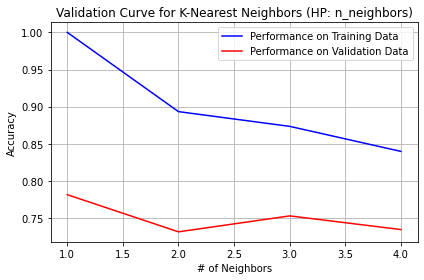

In [50]:
"""
K-Nearest Neighbors (hyperparameter tuning): n_neighbors (Part 2)

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

"""

# initialize
knn_clf = KNeighborsClassifier()

# plot validation curve using training data
param_range = np.arange(1, 5, 1)
train_score, valid_scores = validation_curve(knn_clf, X=X_train, y=y_train, 
                                             param_name="n_neighbors", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for K-Nearest Neighbors (HP: n_neighbors)")
plt.xlabel("# of Neighbors"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

In [26]:
"""
K-Nearest Neighbors (hyperparameter confirmation) using Gridsearch (midway confirm)

"""

# initialize
knn_clf = KNeighborsClassifier()

# list hyperparameters to compare
h_params = {
    'n_neighbors': np.arange(1, 50, 1)
}

# intialize grid search
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
grid_search = GridSearchCV(knn_clf, h_params, cv=skfold, scoring='accuracy')

# fit grid search
grid_search.fit(X_train, y_train)

# return what grid search results
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

print("According to gridsearch")
print("Best parameter values:", grid_search.best_params_)
print("Best classifier:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
0.7815196001772358
According to gridsearch
Best parameter values: {'n_neighbors': 1}
Best classifier: KNeighborsClassifier(n_neighbors=1)
Best score: 0.7815196001772358


Total Training Time (uniform): 0.00597s
Total Testing Time (uniform): 0.03297s
Accuracy using test set: 0.7724489795918368
Accuracy using cross-validation: 0.705186466823706
[[201 112]
 [111 556]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       313
           1       0.83      0.83      0.83       667

    accuracy                           0.77       980
   macro avg       0.74      0.74      0.74       980
weighted avg       0.77      0.77      0.77       980



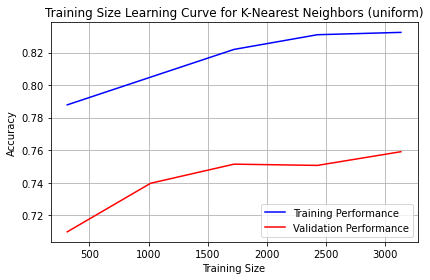

In [27]:
"""
K-Nearest Neighbors (hyperparameter tuning): weights (distance: uniform)

"""

# initialize
knn_clf = KNeighborsClassifier(weights='uniform')
# start timer for training
start = time.time()
# train classifier
knn_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time (uniform): {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = knn_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time (uniform): {round(end-start, 5)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(knn_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=knn_clf, clf_name="K-Nearest Neighbors (uniform)", cv=skfold, scoring="accuracy", X=X_train, y=y_train)

Total Training Time (distance): 0.01241s
Total Testing Time (distance): 0.03303s
Accuracy using test set: 0.8224489795918367
Accuracy using cross-validation: 0.7774599237039044
[[224  89]
 [ 85 582]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       313
           1       0.87      0.87      0.87       667

    accuracy                           0.82       980
   macro avg       0.80      0.79      0.80       980
weighted avg       0.82      0.82      0.82       980



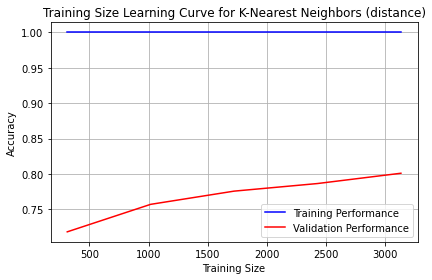

In [28]:
"""
K-Nearest Neighbors (hyperparameter tuning): weights (distance: distance)

"""

# initialize
knn_clf = KNeighborsClassifier(weights='distance')
# start timer for training
start = time.time()
# train classifier
knn_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time (distance): {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = knn_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time (distance): {round(end-start, 5)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(knn_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=knn_clf, clf_name="K-Nearest Neighbors (distance)", cv=skfold, scoring="accuracy", X=X_train, y=y_train)

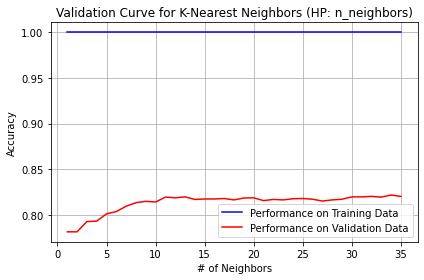

In [29]:
"""
K-Nearest Neighbors (hyperparameter tuning): n_neighbors but weights set to 'distance'

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

"""

# initialize with set number of neighbors (no need for seed for this algo)
knn_clf = KNeighborsClassifier(weights='distance')

# plot validation curve using training data
param_range = np.arange(1, 36, 1)
train_score, valid_scores = validation_curve(knn_clf, X=X_train, y=y_train, 
                                             param_name="n_neighbors", param_range=param_range, cv=skfold, scoring="accuracy")

# average training & validation scores
avg_training_score = np.mean(train_score, axis=1)
avg_validation_score = np.mean(valid_scores, axis=1)

# plot and show
plt.plot(param_range, avg_training_score, color="blue", label="Performance on Training Data")
plt.plot(param_range, avg_validation_score, color="red", label="Performance on Validation Data")
plt.title("Validation Curve for K-Nearest Neighbors (HP: n_neighbors)")
plt.xlabel("# of Neighbors"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

In [30]:
"""
K-Nearest Neighbors (hyperparameter confirmation) using Gridsearch

"""

# initialize
knn_clf = KNeighborsClassifier(weights='distance')

# list hyperparameters to compare
h_params = {
    'n_neighbors': np.arange(1, 50, 1)
}

# intialize grid search
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
grid_search = GridSearchCV(knn_clf, h_params, cv=skfold, scoring='accuracy')

# fit grid search
grid_search.fit(X_train, y_train)

# return what grid search results
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

print("According to gridsearch")
print("Best parameter values:", grid_search.best_params_)
print("Best classifier:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

{'n_neighbors': 34}
KNeighborsClassifier(n_neighbors=34, weights='distance')
0.8218488544843225
According to gridsearch
Best parameter values: {'n_neighbors': 34}
Best classifier: KNeighborsClassifier(n_neighbors=34, weights='distance')
Best score: 0.8218488544843225


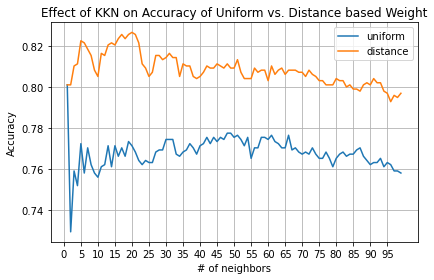

In [53]:
"""
K-Nearest Neighbors (hyper parameter tuning): n_neighbors AND weights

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    
Observations:
    - Given the entire algorithm revolves around the K value, I plotted the cross validated accuracy scores
    of the two types of weights along # of neighbors on the X-Axis. 
    - This was actually incredibly interesting. When weights are based on distance, it seems to be almost
    unaffected by n_neighbors. 
    - After thinking about it more critically, this makes sense because the when distance factors into 
    the calculation, each neighbor's proximity gets weighed more heavily than simply being within the
    vicinity. 
    - Even more interesting is that KNN using weight="distance" benefits from increasing number of neighbors
    since it's able to use the extra information provided by each neighbor more judiciously. 
"""

# plot effect of criterion & max_depth
n_neighbors = []
uni_score = []
dis_score = []
for k in range(1, 100):
    # do by uniform
    knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    uni_score.append(accuracy_score(y_test,y_pred))
    # do by distance
    knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    dis_score.append(accuracy_score(y_test,y_pred))
    # keep track of max_depth
    n_neighbors.append(k)

# prepare comparison data
comp_data = pd.DataFrame({
    'uniform':pd.Series(uni_score),
    'distance':pd.Series(dis_score),
    'n_neighbors':pd.Series(n_neighbors)
    })
    
# plot comparison data
plt.plot('n_neighbors', 'uniform', data=comp_data, label='uniform')
plt.plot('n_neighbors', 'distance', data=comp_data, label='distance')
plt.title("Effect of KKN on Accuracy of Uniform vs. Distance based Weight")
plt.xlabel('# of neighbors'), plt.ylabel('Accuracy'), plt.legend(loc="best")
plt.xticks(np.arange(0,100, 5))
plt.tight_layout()
plt.grid()
plt.show()

In [22]:
"""
K-Nearest Neighbors (hyper parameter confirmation) using Gridsearch
    - Execute gridsearch to confirm optimal hyperparameters
    - 

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    
Observations:
    - 
"""

# initialize
knn_clf = KNeighborsClassifier()

# list hyperparameters to compare
h_params = {
    'n_neighbors': np.arange(1, 50, 1),
    'weights':['uniform', 'distance'],
    'p':[1, 2]
}

# intialize grid search
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
grid_search = GridSearchCV(knn_clf, h_params, cv=skfold, scoring='accuracy')

# fit grid search
grid_search.fit(X_train, y_train)

# return what grid search results
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

print("According to gridsearch")
print("Best parameter values:", grid_search.best_params_)
print("Best classifier:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

{'leaf_size': 1, 'n_neighbors': 32, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(leaf_size=1, n_neighbors=32, p=1, weights='distance')
0.8266957932598326
According to gridsearch
Best parameter values: {'leaf_size': 1, 'n_neighbors': 32, 'p': 1, 'weights': 'distance'}
Best classifier: KNeighborsClassifier(leaf_size=1, n_neighbors=32, p=1, weights='distance')
Best score: 0.8266957932598326


Total Training Time: 0.01397s
Total Testing Time: 0.19214s
Accuracy using test set: 0.8142857142857143
Accuracy using cross-validation: 0.783175460173855
[[201 112]
 [ 70 597]]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       313
           1       0.84      0.90      0.87       667

    accuracy                           0.81       980
   macro avg       0.79      0.77      0.78       980
weighted avg       0.81      0.81      0.81       980



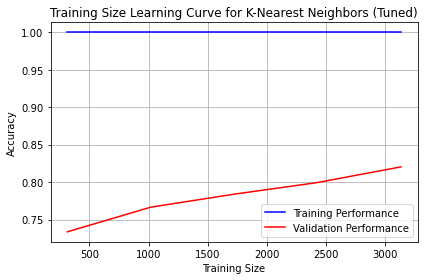

In [31]:
"""
K-Nearest Neighbors - Final Learning Curve
- Generate final learning curve

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    
Observations:
    - All experiments point to the following hyperparameters:
        - algorithm = 'auto' (default)
        - leaf_size = 1
        - n_neighbors = 1
        - p = 2 (default)
"""
# initialize with a seed
knn_clf = KNeighborsClassifier(n_neighbors=32, p=2, weights='distance', leaf_size=1)

# start timer for training
start = time.time()
# train classifier
knn_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time: {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = knn_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time: {round(end-start, 5)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(knn_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=knn_clf, clf_name="K-Nearest Neighbors (Tuned)", scoring='accuracy', X=X_train, y=y_train)

Total Training Time: 0.011s
Total Testing Time: 0.025s
Accuracy using test set: 0.7795918367346939
Accuracy using cross-validation: 0.783175460173855
[[163 150]
 [ 66 601]]
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       313
           1       0.80      0.90      0.85       667

    accuracy                           0.78       980
   macro avg       0.76      0.71      0.72       980
weighted avg       0.77      0.78      0.77       980



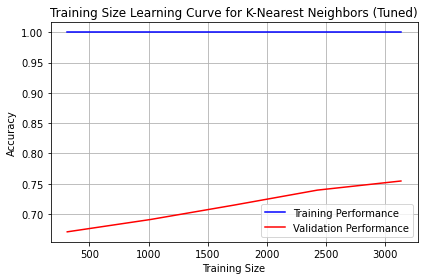

In [35]:
"""
K-Nearest Neighbors - Final Learning Curve
- Generate final learning curve

Sources:
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    
Observations:
    - All experiments point to the following hyperparameters:
        - algorithm = 'auto' (default)
        - leaf_size = 1
        - n_neighbors = 1
        - p = 2 (default)
"""
# initialize with a seed
knn_clf = KNeighborsClassifier(n_neighbors=32, p=2, weights='distance', leaf_size=1)

# start timer for training
start = time.time()
# train classifier
knn_clf.fit(X_train, y_train)
# end timer for training
end = time.time()
# print total time for training
print(f"Total Training Time: {round(end-start, 5)}s")

# start timer for testing
start = time.time()
# make prediction
y_pred = knn_clf.predict(X_test)
# end timer for testing
end = time.time()
# print total time for testing
print(f"Total Testing Time: {round(end-start, 5)}s")

# evaluate model performance on test data
print("Accuracy using test set:", accuracy_score(y_test, y_pred))
# evaluate model performance using cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
cv_scores = cross_val_score(knn_clf, X, y, cv=skfold, scoring='accuracy')
print("Accuracy using cross-validation:", cv_scores.mean())
# evaluate model performance using confusion_matrix
print(confusion_matrix(y_test, y_pred))
# evaluate model performance using classification_report
print(classification_report(y_test, y_pred))

# plot learning curve using training and validation data
get_learning_curve_size(clf=knn_clf, clf_name="K-Nearest Neighbors (Tuned)", scoring='accuracy', X=X_train, y=y_train)